# Puerta de Hadamard (H)

### Explicación de la puerta

Esta puerta es usada para crear superposición. Coloca al qubit en una combinación de los estados |0⟩ y |1⟩. La representación matricial de la puerta es: 

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$

### Circuito de la puerta con Qiskit y Matplot



Circuito con Hadamard:


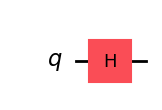

In [18]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

qc = QuantumCircuit(1)  
qc.h(0)

print("\nCircuito con Hadamard:")
qc.draw('mpl')



### Visualización de la esfera de Bloch


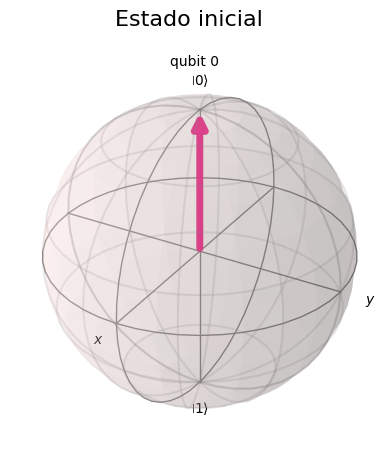

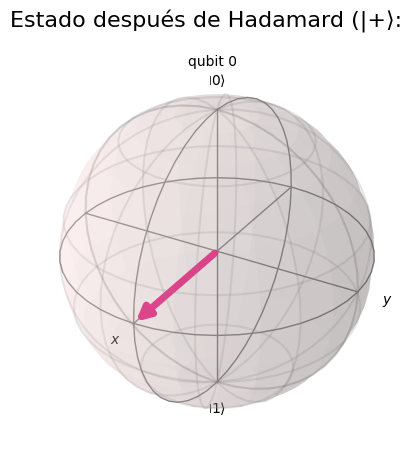

In [20]:
state_initial = Statevector.from_label('0')
state_after_h = Statevector.from_instruction(qc)

display(plot_bloch_multivector(state_initial, title= "Estado inicial"))
plot_bloch_multivector(state_after_h, title="Estado después de Hadamard (|+⟩:")

### Ejecución del circuito tras 1024 shots

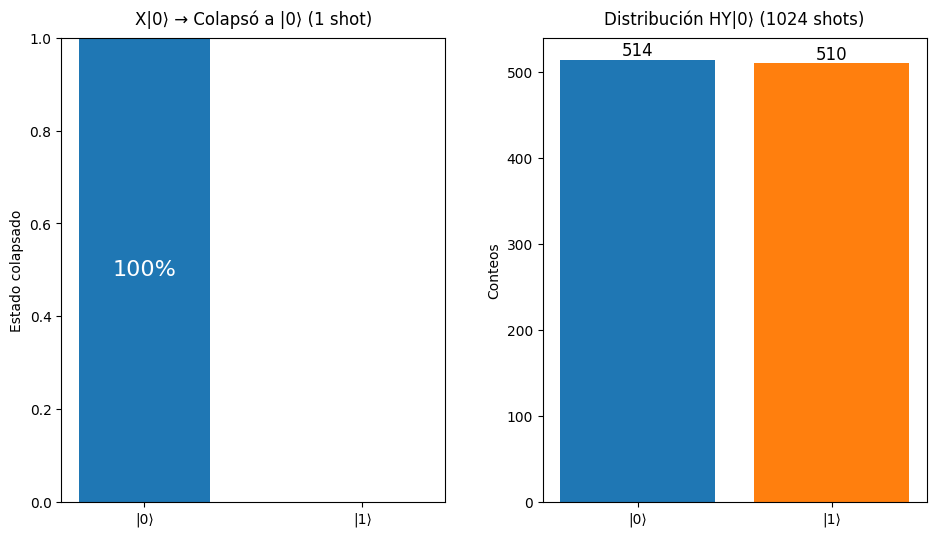

In [16]:
qc_measured = QuantumCircuit(1, 1)  
qc_measured.h(0) 
qc_measured.measure(0, 0) 

simulator = Aer.get_backend('qasm_simulator')

result = simulator.run(transpile(qc_measured, simulator), shots=1, memory=True).result()
colapsed_value = result.get_memory()[0]

result_stats = simulator.run(transpile(qc_measured, simulator), shots=1024).result().get_counts()


plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(['|0⟩', '|1⟩'], 
        [1 if colapsed_value == '0' else 0, 1 if colapsed_value == '1' else 0],
        color=['#1f77b4', '#ff7f0e'], width=0.6)
plt.title("X|0⟩ → Colapsó a |{}⟩ (1 shot)".format(colapsed_value), fontsize=12, pad=10)
plt.ylim(0, 1)
plt.ylabel("Estado colapsado")

for i, val in enumerate([colapsed_value == '0', colapsed_value == '1']):
    plt.text(i, 0.5, f"{100 if val else 0}%", 
             ha='center', va='center', fontsize=16, color='white')



plt.subplot(1, 2, 2)

bars = plt.bar(['|0⟩', '|1⟩'], 
               [result_stats.get('0', 0), result_stats.get('1', 0)],
               color=['#1f77b4', '#ff7f0e'])


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, 
             f'{int(height)}', 
             ha='center', va='bottom', fontsize=12)

plt.title("Distribución HY|0⟩ (1024 shots)", fontsize=12, pad=10)
plt.ylabel("Conteos")

plt.tight_layout(pad=3.0)

### Circuito Hadamard medido 


Circuito de medición


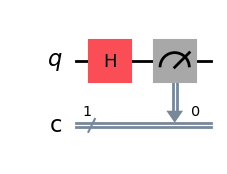

In [21]:
print("\nCircuito de medición")
qc_measured.draw('mpl')